In [1]:

from python_environment_check import check_packages
from python_environment_check import set_background

## Colour schemes for setting background colour
white_bgd = 'rgba(0,0,0,0)'
red_bgd = 'rgba(255,0,0,0.2)'

[OK] Your Python version is 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]


In [2]:
# Mount Google Drive
import os

colabFlag = False
PATH_DATASETS = os.environ.get("PATH_DATASETS", ".")
print(f"Not using Google Colab. File path will be: {PATH_DATASETS}")

Not using Google Colab. File path will be: .


In [3]:
# !pip install numpy
# !pip install pandas
#!pip install imutils
# !pip install matplotlib
#!pip install opencv-python
# !pip install torch
# !pip install torchvision
# !pip install scikit-image
# !pip install git+https://github.com/keras-team/keras-tuner.git
# !pip install autokeras

In [4]:
import copy
import time
import os

import random
import numpy as np
import pandas as pd

import imutils
import matplotlib.pyplot as plt
import math

from PIL import Image, ImageEnhance
from skimage import io, transform



import autokeras as ak
import tensorflow as tf

import torch
import torchvision

import torchvision.transforms.functional as TF
from torchvision import datasets, models, transforms

from torch.utils.data import DataLoader, random_split
from torch.utils.data.dataset import Dataset

from IPython.core.display import display
from IPython.display import clear_output


BATCH_SIZE = 256 if torch.cuda.is_available() else 64



# Define GPU number
GPU_indx = 0
device = torch.device(GPU_indx if torch.cuda.is_available() else 'cpu')
print(device)
num_workers = 4 ## Set to your device
torch.cuda.empty_cache()

#check if autokeras uses GPU


print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())



Using TensorFlow backend


C:\Users\david\AppData\Local\Temp\ipykernel_34416\1329548822.py:30: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


cuda:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


In [5]:
def add_data (csv_path, images_path, image_array, label_array, id_start):
    #end csv path input as .csv in string format
    #end image path as / in string format
    
    #do not modify image array and label arr
    
    with open(csv_path) as file_obj:
        reader_obj = csv.reader(file_obj) 
        idCounter = id_start
        for labels in reader_obj: 
            if not(labels[0] == labels[1] and labels[0] == '0'): #remove all zeros 
                #label object retrieval
                object = np.array([labels]).astype(int)

                #image augmentation block
                img_add = Image.open(images_path + "img_" + str(idCounter) +".png")
                
                
                contrast_enhancer = ImageEnhance.Contrast(img_add)
                img_add = contrast_enhancer.enhance(1.5)
                
                sharpness_enhancer = ImageEnhance.Sharpness(img_add)
                img_add = sharpness_enhancer.enhance(4)

                img_add = [asarray(img_add)[0:320][180:260]]
                
                #label and image append
                label_array = np.append(label_array,object, axis = 0)
                image_array = np.append(image_array,img_add, axis = 0)
                
            idCounter += 1
    return image_array, label_array #need to be returned since np.append returns a new list 


In [6]:
#create label object
from PIL import Image
from numpy import asarray
import csv

#read from normal dataset

#image array initialisation
img = asarray(Image.open("normal_dataset/dataset1/pibot_dataset/img_" + str(0) +".png"))
img_arr = [img[0:320][180:260]]#initialise array

#label array intialisation
label_arr = [[0,0]]

img_arr, label_arr = add_data("normal_dataset/actions1_Copy.csv", "normal_dataset/dataset1/pibot_dataset/", img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine

for i in range(8):
    img_arr, label_arr = add_data('dataset_26thFeb/turns_only/' + str(i+1) + '/actions.csv', 'dataset_26thFeb/turns_only/' + str(i+1) + '/', img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine


for i in range(45):
    if i != 17:
        img_arr, label_arr = add_data('dataset_27thFeb/turns_only_2/turns_only/' + str(i+1) + '/actions.csv', 'dataset_27thFeb/turns_only_2/turns_only/' + str(i+1) + '/', img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine


for i in range(4):
    img_arr, label_arr = add_data('dataset_11thFeb/main_straight_and_turns_' + str(i+1) + '/actions.csv', 'dataset_11thFeb/main_straight_and_turns_' + str(i+1) + '/', img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine


for i in range(2):
    img_arr, label_arr = add_data('dataset_17thFeb/full_track_clockwise_' + str(i+1) + '/actions.csv', 'dataset_17thFeb/full_track_clockwise_' + str(i+1) + '/', img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine


for i in range(3):
    img_arr, label_arr = add_data('dataset_17thFeb/full_track_counter_clockwise_' + str(i+1) + '/actions.csv', 'dataset_17thFeb/full_track_counter_clockwise_' + str(i+1) + '/', img_arr, label_arr,0)
print(len(img_arr), len(label_arr)) #check if funcrtion works fine



323 323
519 519
2213 2213
2879 2879
3712 3712
4961 4961


4960
4960
1
4960


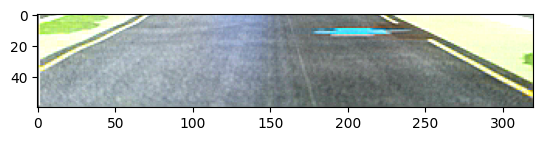

In [7]:
label_arr = label_arr[1:len(label_arr)]
img_arr = img_arr[1:len(img_arr)]

print(len(label_arr))
print(len(img_arr))
print((label_arr[0][0]))

plt.imshow(img_arr[0])
print(len(img_arr))


In [8]:
# img_test_contrast = Image.open("normal_dataset/dataset1/pibot_dataset/img_" + str(0) +".png")
# contrast_enhancer = ImageEnhance.Contrast(img_test_contrast)
# img_contrast = contrast_enhancer.enhance(2)
# img_contrast.show()

# sharpness_enhancer = ImageEnhance.Sharpness(img_contrast)
# sharpness_enhancer.enhance(4).show()

In [9]:
max_label = np.max(label_arr)
mean_label = np.mean(label_arr)

median_label = np.median(label_arr)
sorted_label = np.sort(label_arr.reshape(-1))
Q1,Q3 = np.percentile(sorted_label,[25,75])
IQR_label = Q3-Q1
print(label_arr)
print(label_arr-median_label)
print((label_arr-median_label)/IQR_label)


[[ 1  2]
 [ 9 12]
 [35 31]
 ...
 [53 51]
 [52 52]
 [40 40]]
[[-6. -5.]
 [ 2.  5.]
 [28. 24.]
 ...
 [46. 44.]
 [45. 45.]
 [33. 33.]]
[[-0.15  -0.125]
 [ 0.05   0.125]
 [ 0.7    0.6  ]
 ...
 [ 1.15   1.1  ]
 [ 1.125  1.125]
 [ 0.825  0.825]]


In [10]:
print(IQR_label)
print(median_label)

40.0
7.0


In [11]:
print(img_arr.shape)

(4960, 60, 320, 3)


In [12]:
class Section1Data(Dataset):
    def __init__(self, index , transform=None):
        # Load numpy data
        # Create dataset for trainloader --> images arr_0, labels arr_1
        self.images = [img_arr[i] for i in index]
        self.labels = [label_arr[i] for i in index]

        #image normalisation
        self.images = np.asarray(self.images).astype('float32') /255.0
        self.labels = np.asarray(self.labels).astype('float32') - median_label
        self.labels = self.labels/IQR_label
        
        self.transform = transform   ## Save the transforms as your class' attributes
        plt.imshow(self.images[0])
        
    # Define len function
    def __len__(self):
        return len(self.labels)

    # Define getitem function
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
   
        sample = self.images[idx,:]
        labels = self.labels[idx]
        
        if self.transform is not None:  ## If there is a transform, apply it here to your sample
            sample = self.transform(sample)

        labels = torch.as_tensor(labels)
        return sample, labels

In [14]:
"""
get indexes for division
train, val, test --> (70 15) 15
"""
total = len(img_arr)
id_list = list(range(total))
train_id = random.sample(id_list, math.floor(0.85*total))

for index in sorted(train_id, reverse=True):
  id_list.pop(index)

# id_list2 = list(range(len(id_list))) #after the removal, the id list len will change
# val_pseudo_id = random.sample(id_list2, math.floor(0.15*total))
# val_id = [id_list[i] for i in val_pseudo_id]

# for index in sorted(val_pseudo_id, reverse=True):
#   id_list.pop(index)

test_id = id_list #whatever is left


In [15]:
# def create_dataset_list (set):
#     list_a = np.array([])
#     list_b = np.array([])

#     for i in range(len(set)):
         
#         img_tensor, label_tensor = set[i]
#         list_a = np.append(list_a, img_tensor)
#         list_b = np.append(list_b,label_tensor)

    
#     return list_a, list_b


# # def create_dataset_list (set):
# #     list_a = []
# #     list_b = []
# #     for i in range(len(set)):
# #             img_tensor, label_tensor = set[i]
# #             list_a.append(img_tensor)
# #             list_b.append(label_tensor)
# #     # print(list_a.shape)
# #     list_a = np.array(list_a)
# #     list_b = np.array(list_b)
# #     return list_a, list_b

# # import array
# # def create_dataset_list (set):
# #     list_a = []
# #     list_b = []
# #     for i in range(len(set)):
# #             img_tensor, label_tensor = set[i]
# #             list_a.append(img_tensor)
# #             list_b.append(label_tensor)
# #     #print(list_a.shape)
# #     list_a = np.array(list_a)
# #     list_b = np.array(list_b)
# #     return list_a, list_b
    

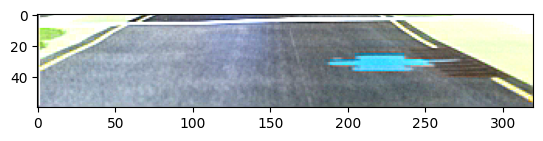

In [16]:
set_background(red_bgd)

BATCH_SIZE = 16
transform_tensor = transforms.Compose([transforms.ToTensor()])
# Call training dataset and create the trainloader. Make sure to transform your data to tensor!!!! Shuffle your training data
trainset = Section1Data(train_id,transform_tensor)  



# Call validation dataset and create the valloader. Make sure to transform your data to tensor!!!!
#valset = Section1Data(val_id,transform_tensor) 


# Call testing dataset and create the testloader. Make sure to transform your data to tensor!!!!
testset = Section1Data(test_id,transform_tensor) 
testloader  = DataLoader(dataset=testset, batch_size=BATCH_SIZE, shuffle=False, num_workers = 0)






In [17]:
# Initialize the image regressor.
reg2 = ak.ImageRegressor(overwrite=True, max_trials=3, objective="val_loss")
# Feed the image regressor with training data.


In [ ]:
reg2.fit(trainset.images, trainset.labels, epochs=700)

Trial 3 Complete [00h 08m 29s]
val_loss: 0.6702350378036499

Best val_loss So Far: 0.6166207194328308
Total elapsed time: 00h 23m 29s
Epoch 1/700
132/132 [==============================] - 61s 231ms/step - loss: 37.9893 - mean_squared_error: 37.9893
Epoch 2/700
132/132 [==============================] - 30s 226ms/step - loss: 12.7559 - mean_squared_error: 12.7559
Epoch 3/700
132/132 [==============================] - 30s 227ms/step - loss: 1.9960 - mean_squared_error: 1.9960
Epoch 4/700
132/132 [==============================] - 30s 227ms/step - loss: 1.2545 - mean_squared_error: 1.2545
Epoch 5/700
132/132 [==============================] - 30s 228ms/step - loss: 1.4104 - mean_squared_error: 1.4104
Epoch 6/700
132/132 [==============================] - 30s 227ms/step - loss: 1.9650 - mean_squared_error: 1.9650
Epoch 7/700
132/132 [==============================] - 30s 227ms/step - loss: 1.2036 - mean_squared_error: 1.2036
Epoch 8/700
132/132 [==============================] - 30s 227ms

1/1 [==============================] - 0s 49ms/step
[[ 0.05444629 -0.03379911]
 [ 0.23851644  0.1764714 ]
 [ 0.28120336  0.16340366]
 [-0.39164007  0.29387483]
 [ 0.3126924   0.33958015]
 [ 0.19057028  0.2019426 ]
 [ 0.05701205  0.18849716]
 [ 0.28655136  0.30596107]
 [ 0.05063879  0.08412208]
 [ 0.49017155  0.62843513]
 [ 0.24292976  0.3437094 ]
 [ 0.42328495  0.50605834]
 [ 0.19239548  0.39593744]
 [ 0.06716619  0.53932106]
 [ 0.41573775  0.5884286 ]
 [ 0.41258886  0.35727376]]


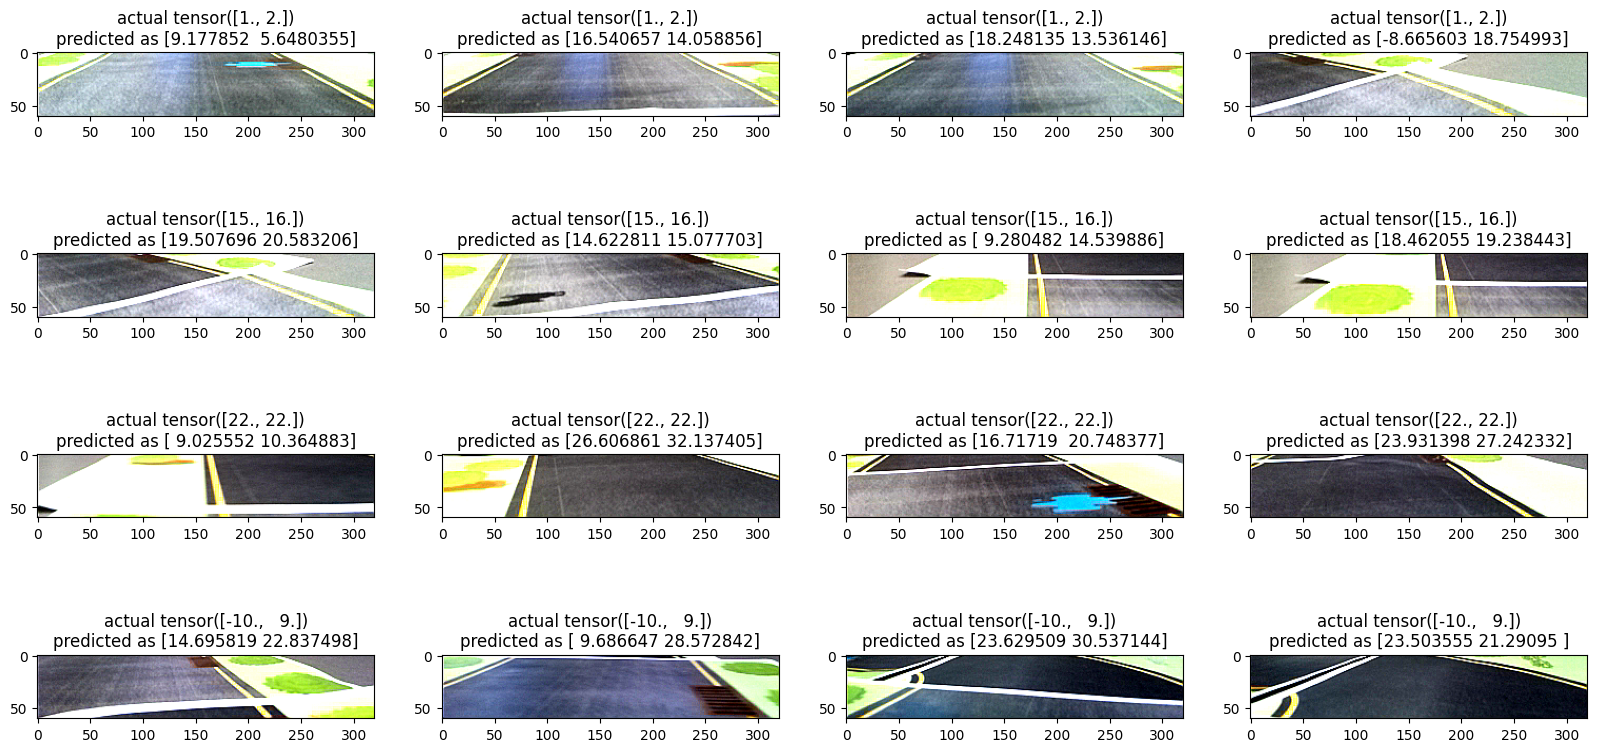

In [17]:
actual_set = iter(testloader)
pictures, labels = next(actual_set)
#pictures, labels = next(actual_set) #to get 2nd batch
#pictures, labels = next(actual_set) #to get 3rd batch
pictures = pictures.reshape(BATCH_SIZE,60,320,3) #reshape the picture
predictions = reg2.predict(np.array(pictures))
pictures = pictures.reshape(BATCH_SIZE,3,60,320) #reshape the picture

print(predictions)
fig,comparator = plt.subplots(4,4,figsize = ( 20 , 10 )) #for the subplots
#out of the 100 images in the each of the 20 batch, pick 5 random ones
for i in range(0, 4):
    for j in range(0, 4):
        image = torchvision.utils.make_grid(pictures[i*4 + j])
        
        #now get the individual predictions by passing it to the softmax, along the rows, and take the maximum one
        pred = predictions[i*4 + j]
        
        
        comparator[i][j].imshow(image.numpy().transpose((1, 2, 0)))
        
        
        comparator[i][j].set_title("actual " + str((labels[i]*IQR_label)+median_label) + "\npredicted as " + str((pred*IQR_label)+median_label))
        

1/1 [==============================] - 0s 59ms/step


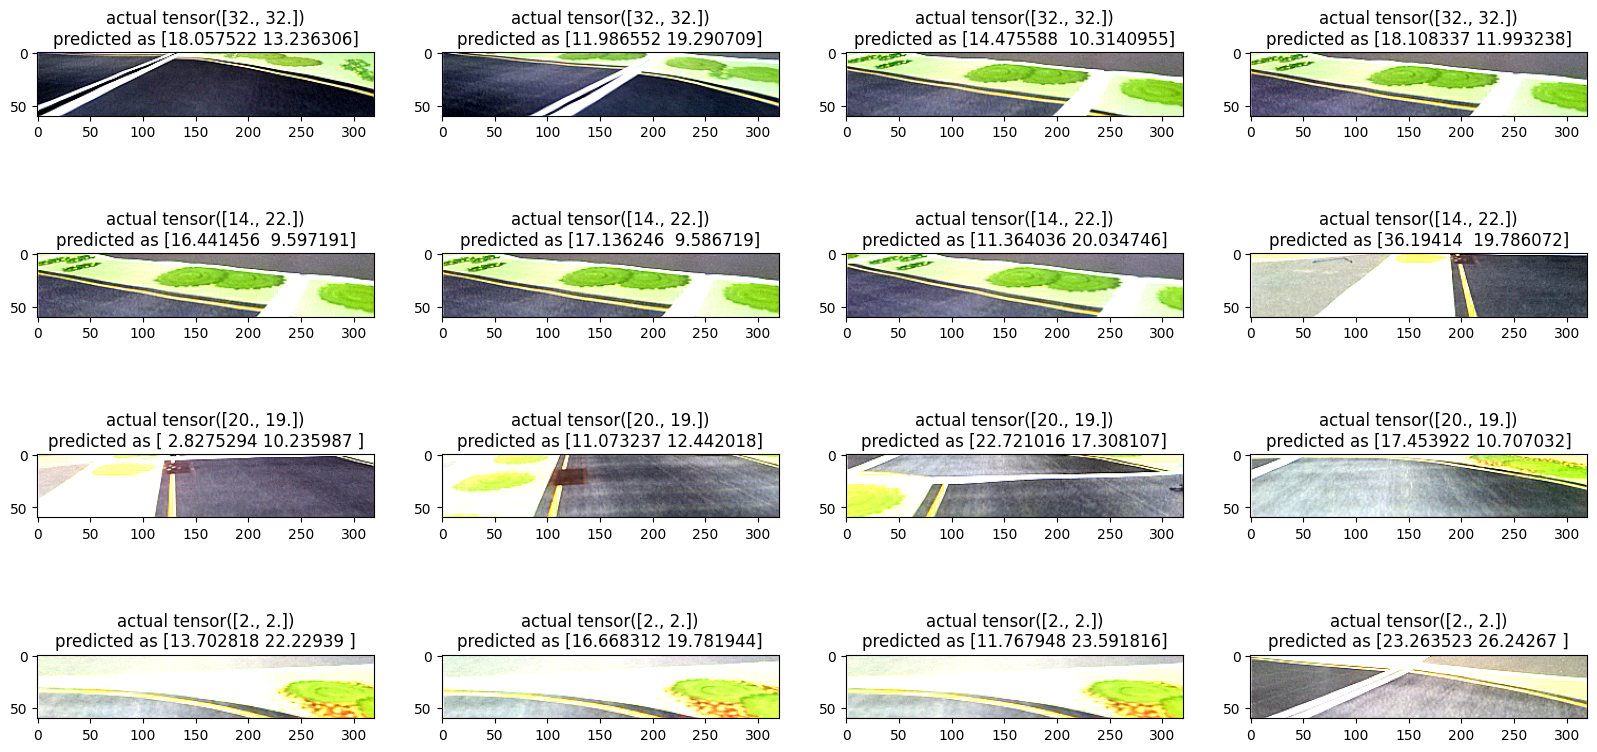

In [18]:
actual_set = iter(testloader)
pictures, labels = next(actual_set)
pictures, labels = next(actual_set) #to get 2nd batch
#pictures, labels = next(actual_set) #to get 3rd batch

pictures = pictures.reshape(BATCH_SIZE,60,320,3) #reshape the picture
predictions = reg2.predict(np.array(pictures))
pictures = pictures.reshape(BATCH_SIZE,3,60,320) #reshape the picture

fig,comparator = plt.subplots(4,4,figsize = ( 20 , 10 )) #for the subplots
#out of the 100 images in the each of the 20 batch, pick 5 random ones
for i in range(0, 4):
    for j in range(0, 4):
        image = torchvision.utils.make_grid(pictures[i*4 + j])
        
        #now get the individual predictions by passing it to the softmax, along the rows, and take the maximum one
        pred = predictions[i*4 + j]
        
        
        comparator[i][j].imshow(image.numpy().transpose((1, 2, 0)))
        
        
        comparator[i][j].set_title("actual " + str((labels[i]*IQR_label)+median_label) + "\npredicted as " + str((pred*IQR_label)+median_label))




1/1 [==============================] - 0s 65ms/step


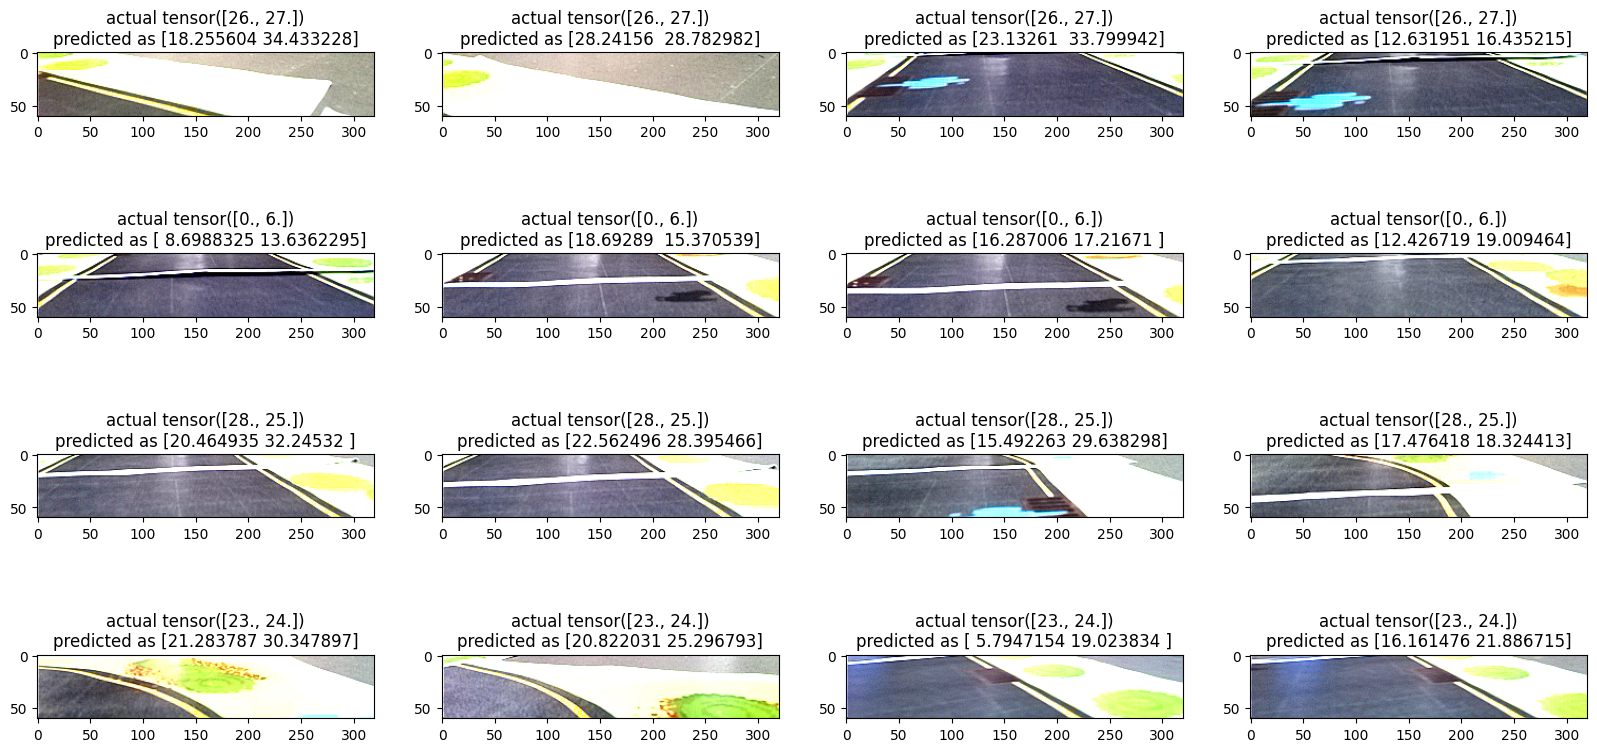

In [19]:
actual_set = iter(testloader)
pictures, labels = next(actual_set)
pictures, labels = next(actual_set) #to get 2nd batch
pictures, labels = next(actual_set) #to get 3rd batch

pictures = pictures.reshape(BATCH_SIZE,60,320,3) #reshape the picture
predictions = reg2.predict(np.array(pictures))
pictures = pictures.reshape(BATCH_SIZE,3,60,320) #reshape the picture

fig,comparator = plt.subplots(4,4,figsize = ( 20 , 10 )) #for the subplots
#out of the 100 images in the each of the 20 batch, pick 5 random ones
for i in range(0, 4):
    for j in range(0, 4):
        image = torchvision.utils.make_grid(pictures[i*4 + j])
        #print(image.shape)
        #now get the individual predictions by passing it to the softmax, along the rows, and take the maximum one
        pred = predictions[i*4 + j]
        
        
        comparator[i][j].imshow(image.numpy().transpose((1, 2, 0)))
        
        
        comparator[i][j].set_title("actual " + str((labels[i]*IQR_label)+median_label) + "\npredicted as " + str((pred*IQR_label)+median_label))


In [20]:
model = reg2.export_model()
model.save("model_autokeras_two_wheels_6thMarCropped180SaturationSharpness", save_format="tf")

INFO:tensorflow:Assets written to: model_autokeras_two_wheels_6thMarCropped180SaturationSharpness\assets


INFO:tensorflow:Assets written to: model_autokeras_two_wheels_6thMarCropped180SaturationSharpness\assets


In [29]:
from tensorflow.keras.models import load_model

reg2 = load_model("model_autokeras_two_wheels_5thMar", custom_objects=ak.CUSTOM_OBJECTS)

In [22]:
# Define occlusion_sensitivity function
# Input parameters to the function: patch_size, patch_stride, img_tensor, model
# Return values: img_prob
patch_size = 20
patch_stride = 5

# Define occlusion_sensitivity function
# Input parameters to the function: patch_size, patch_stride, img_tensor, model
# Return values: img_prob
def occlusion_sensitivity(patch_size, patch_stride, img_tensor, model, label_input):
    print(img_tensor.shape)
    H, W, C = img_tensor.shape

    ## Calculate the size of your patch.
    ## THis can be done by using your patch_size and patch_stride
    ## Sound familiar?
    ## Hint: look at the calculation for convolution dimensions
    h_patches = np.floor(1+(H-patch_size)/patch_stride).astype(int)
    w_patches = np.floor(1+(W-patch_size)/patch_stride).astype(int)
    
    ## Set the patch as zeroes
    img_prob = np.zeros([h_patches,w_patches])

    ## Apply the patch across the entire image
    ## You can go by height first, then by rows
    ## When overlaying your patch  the image, ensure that you .clone() the tensor first
    ## This is because Python uses the memory address when you do "temp_tensor = original_tensor"

    #iterate all the pixels in each column
    for h in range(H): #go by height first
        for w in range(W): # go by column next
            #get the starting point and ending point fo the convolution block
            #starting point is multiplicative of patch_stride meaning that after each convolution
            #it moves patch_stride column after each horizontal movement or a patch_stride rows
            #after each vertical movements
            h_start = h*patch_stride
            w_start = w*patch_stride
            #get the kernel ends, making sure not to go beyond the boundary
            #it follows the end is the starting point + the kernel size
            #note h_end and w_end are exclusive to indexing
            h_end = h_start + patch_size
            w_end = w_start + patch_size
            #stop current loop early if the patch is out of bound
            if h_end >= H:
              continue
            if w_end > W:
              continue

            #clone image and Zero out the elements inside the patch
            cloned = img_tensor.clone().detach()
            cloned = cloned.unsqueeze(0) #create mini batch expected of resnet
            cloned[:,:, w_start:w_end, h_start:h_end] = 0 #set to 0

            #measure the confidence of the ResNet (i.e., the RMSE value)
            confidence = model(cloned).item() #train
           
            error = sqrt((confidence-label_input.item())*(confidence-label_input.item())) 
            
            # prob = F.softmax(confidence) #get the probablities
            # most_confident = torch.max(prob) #get the highest prob

            # #set the probs
            #print(h)
            #print(w)
            img_prob[h][w] = error

    ## The final output of img_prob will be the image probabilities corresponding to
    ## each position of your image based on where your patch was overlaid


    return img_prob

# Define plot_occlusion_sensitivity function
# Input parameters to the function: img_pil, img_prob
def plot_occlusion_sensitivity(img_pil, img_prob):

    ## img_pil is the PIL image
    ## img_prob is the extracted probabilities for each patch
    ## Ensure you use preprocess_resize_crop and transforms.functional.to_pil_image
    #img_pil = preprocess_resize_crop(img_pil)
    #img_pil = TF.to_pil_image(img_pil)

    ## Normalize your img_prob between min and max
    ## This way, you can use a heatmap
    ## For example: plt.imshow(occ_sens_arr, cmap="hot")
    ## Ensure you add some coloured bars to the final plot
    fig, occlusion_figure = plt.subplots(1,2)
    heatmap = occlusion_figure[1].imshow(img_prob, cmap="hot")
    occlusion_figure[0].imshow(img_pil.numpy().transpose((1,2,0)))

    fig.colorbar(heatmap)

    occlusion_figure[1].set_title("Occlusion sensitivity \nplot")
    



In [23]:
import time

In [ ]:
for i in range (1):
    img_prob = occlusion_sensitivity(patch_size, patch_stride, torch.tensor(img_arr[i]).transpose((2,0,1)), model_to_test, torch.tensor(label_arr[i]))
    
    plot_occlusion_sensitivity(torch.tensor(img_arr[i]),img_prob)
    

In [ ]:
# img_url : https://i.cbc.ca/1.5352059.1573161914!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/wandi.jpg
# Open image using PIL library
#img_url = "https://i.cbc.ca/1.5352059.1573161914!/fileImage/httpImage/image.jpg_gen/derivatives/16x9_780/wandi.jpg"
#img_pil = Image.open(requests.get(img_url, stream=True).raw)

# Now preprocess above image
#img_tensor = preprocess(img_pil)

# Create a mini-batch as expected by the model
#img_batch = torch.unsqueeze(img_tensor, 0)

# Evaluate the image
#prob0, dummy1, pred_class_name = eval_img(img_batch, resnet_model)

# Plot occlusion
plot_occlusion_sensitivity(img_pil,prob0)

In [ ]:
# #read from turns_bot_left_3
# numOfFiles = len(os.listdir("turning_dataset/turns_bot_left_3/"))

# with open('turning_dataset/turns_bot_left_3/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 8

#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_bot_left_3/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
            
#         idCounter += 1
        
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

# #read from turns_bot_left_4
# numOfFiles = len(os.listdir("turning_dataset/turns_bot_left_4/"))

# with open('turning_dataset/turns_bot_left_4/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 11
#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_bot_left_4/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
            
            
#         idCounter += 1
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

# #read from turns_mid_left_3
# numOfFiles = len(os.listdir("turning_dataset/turns_mid_left_3/"))

# with open('turning_dataset/turns_mid_left_3/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 0
#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_mid_left_3/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
            
#         idCounter += 1
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

# #read from turns_mid_left_4
# numOfFiles = len(os.listdir("turning_dataset/turns_mid_left_4/"))

# with open('turning_dataset/turns_mid_left_4/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 0
#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_mid_left_4/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
        
#         idCounter += 1
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

# #read from turns_top_left_3
# numOfFiles = len(os.listdir("turning_dataset/turns_top_left_3/"))

# with open('turning_dataset/turns_top_left_3/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 0
#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_top_left_3/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
            
#         idCounter += 1
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

# #read from turns_top_left_4
# numOfFiles = len(os.listdir("turning_dataset/turns_top_left_4/"))

# with open('turning_dataset/turns_top_left_4/actions.csv') as file_obj: #left wheel
#     reader_obj = csv.reader(file_obj) 
#     idCounter = 0
#     for labels in reader_obj: 
#         object = np.array([labels]).astype(int)
        
    
#         label_arr = np.append(label_arr,object, axis = 0)
#         img_add = [asarray(Image.open("turning_dataset/turns_top_left_4/img_" + str(idCounter) +".png"))[0:320][150:260]]
#         img_arr = np.append(img_arr,img_add, axis = 0)
            
#         idCounter += 1
# print(len(label_arr))
# print(len(img_arr))
# print((label_arr[0]))

In [ ]:
# xtrain = []
# ytrain = []
# for i in range(len(trainset)):
#     img_tensor, label_tensor = trainset[i]
#     xtrain.append(img_tensor)
#     ytrain.append(label_tensor)

# xtrain = np.array(xtrain)
# ytrain = np.array(ytrain)

# xtest = []
# ytest = []
# for i in range(len(testset)):
#     img_tensor, label_tensor = testset[i]
#     xtest.append(img_tensor)
#     ytest.append(label_tensor)

# xtest = np.array(xtest)
# ytest = np.array(ytest)

# xtrainval = []
# ytrainval = []

# for i in range(len(trainset)):
#     img_tensor, label_tensor = trainset[i]
#     xtrainval.append(img_tensor)
#     ytrainval.append(label_tensor)

# for i in range(len(valset)):
#     img_tensor, label_tensor = valset[i]
#     xtrainval.append(img_tensor)
#     ytrainval.append(label_tensor)

# xtrainval = np.array(xtrainval)
# ytrainval = np.array(ytrainval)